# Computing Vision data analysis

## Part 1: Preparing data

In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns
sns.set()

In [3]:
#read data
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


### Movie gross dataset

In [4]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
# change foreign_gross column from object type to float
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].astype("float64")




<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

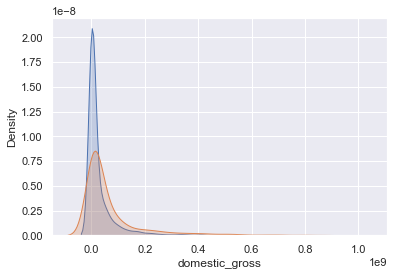

In [8]:
#kernel density plot
sns.kdeplot( movie_gross['domestic_gross'],shade= True)
sns.kdeplot( movie_gross['foreign_gross'],shade= True)

In [9]:
##fill NA with median in foreign_gross and domestic_gross columns 
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].fillna(movie_gross['foreign_gross'].median())
movie_gross['domestic_gross'] = movie_gross["domestic_gross"].fillna(movie_gross['domestic_gross'].median())
#drop 5 NA in studio column
movie_gross= movie_gross.dropna()

In [10]:
movie_gross['foreign_gross'].mean()

52516148.51463631

In [11]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

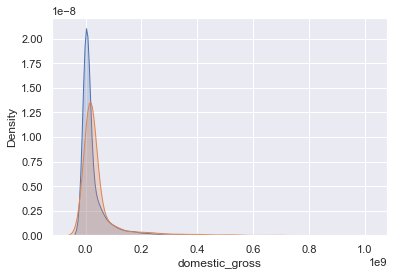

In [12]:
#kernel density plot after fill N/A with median
sns.kdeplot( movie_gross['domestic_gross'],shade= True)
sns.kdeplot( movie_gross['foreign_gross'],shade= True)


### Movie_info dataset

In [13]:

movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
#change theater_date and dvd_date object type to date type
movie_info['theater_date']= pd.to_datetime(movie_info['theater_date'])
movie_info['dvd_date'] = pd.to_datetime(movie_info['dvd_date'])
#change runtime   to float data type
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes','')
movie_info['runtime']  = movie_info['runtime'].astype("float64")
#movie_info['box_office']= movie_info['box_office'].astype("float64")
### create copy of movie data set that remove 3 columns currency, box office and studio
movie_info_1= movie_info.copy()
movie_info_1= movie_info_1.drop(labels=['currency', 'box_office', 'studio'], axis=1)


In [15]:
#drop na
movie_info_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   runtime       1530 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 109.8+ KB


In [16]:
movie_info_1.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 68.8+ KB


<AxesSubplot:xlabel='theater_date', ylabel='Count'>

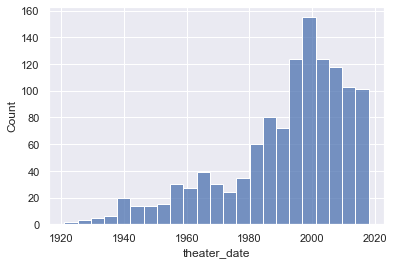

In [17]:
#histogram of movie year 
sns.histplot(movie_info_1['theater_date'].dt.year)

In [18]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104.0,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116.0,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128.0,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,2007-01-02,$,"33,886,034",106.0,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17,NaN,NaN,88.0,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11,NaN,NaN,111.0,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,NaN,NaN,101.0,NaN


### Review dataset

In [19]:
reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [20]:
# rt_info.rename(columns={'currency':'currency_dollars'}, inplace=True)
# rt_info['currency_dollars'].fillna(False, inplace=True)
# rt_info.loc[rt_info['currency_dollars'] == '$', 'currency_dollars'] = True

In [21]:
reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [22]:
reviews.groupby("id").count()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,162,113,163,160,163,163,163
5,6,20,23,21,23,23,23
6,49,41,57,52,57,57,57
8,57,40,75,69,75,75,75
10,107,61,108,104,108,107,108
...,...,...,...,...,...,...,...
1996,135,115,143,139,143,142,143
1997,19,23,28,24,28,28,28
1998,2,2,2,2,2,2,2


### movies dataset


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [24]:
movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### movie_bugets dataset

In [25]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
#clean movie_budget dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(clean_currency).astype('float64')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(clean_currency).astype('float64')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(clean_currency).astype('float64')
movie_budgets['release_date']= pd.to_datetime(movie_budgets['release_date'])

In [27]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [28]:
 ####don't need fill foreign gross because we have info in movie_buget
movie_buget_gross= movie_budgets.merge(movie_gross, how='inner', left_on= 'movie', right_on='title' )
movie_buget_gross

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,Avengers: Infinity War,BV,678800000.0,1369.5,2018
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,Justice League,WB,229000000.0,428900000.0,2017
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Spectre,Sony,200100000.0,680600000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
1241,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,Sound of My Voice,FoxS,408000.0,18700000.0,2012
1242,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,Your Sister's Sister,IFC,1600000.0,18700000.0,2012
1243,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,The Gallows,WB (NL),22800000.0,20200000.0,2015
1244,86,2017-07-07,A Ghost Story,100000.0,1594798.0,2.769782e+06,A Ghost Story,A24,1600000.0,18700000.0,2017


In [29]:
###merge table
movie_buget_gross= movie_budgets.merge(movie_gross, how='inner', left_on= 'movie', right_on='title' )
df1= movie_buget_gross[movie_buget_gross.columns[0:8]]
df1= df1.drop(labels='title',axis=1)
df1.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,Sony


In [30]:
df2= df1.merge(movies, how='inner', left_on= 'movie', right_on='title' )
df2.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [31]:
remove_list=[ 'Unnamed: 0', 'original_title','release_date_y', 'title']

df2= df2.drop(labels=remove_list,axis=1)
df2.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,id_y,original_language,popularity,vote_average,vote_count
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",1865,en,30.579,6.4,8571
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"[28, 12, 878]",99861,en,44.383,7.3,13457
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,"[12, 28, 14]",299536,en,80.773,8.3,13948
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"[28, 12, 14, 878]",141052,en,34.953,6.2,7510
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"[28, 12, 14, 878]",141052,en,34.953,6.2,7510


### SQL database

In [32]:
import zipfile

zip_file = "zippedData/im.db.zip"

try:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall("zippedData/unZippedim.db")
        print("Extracted all")
except:
    print("Invalid file")
conn = sqlite3.connect("zippedData/unZippedim.db/im.db")

Extracted all


In [76]:
q1= """
SELECT * 
FROM movie_basics
INNER JOIN movie_ratings
USING("movie_id")
INNER JOIN movie_akas
USING("movie_id")



"""
sql_dataset_merge1 = pd.read_sql(q1,conn)


In [77]:
sql_dataset_merge1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,en,None,literal English title,0.0
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,None,0.0
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0


In [83]:
#keep only origin movie
sql_dataset_merge1= sql_dataset_merge1[sql_dataset_merge1.is_original_title==1]

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1393
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               1394 non-null   int64         
 1   release_date_x     1394 non-null   datetime64[ns]
 2   movie              1394 non-null   object        
 3   production_budget  1394 non-null   float64       
 4   domestic_gross_x   1394 non-null   float64       
 5   worldwide_gross    1394 non-null   float64       
 6   studio             1394 non-null   object        
 7   genre_ids          1394 non-null   object        
 8   id_y               1394 non-null   int64         
 9   original_language  1394 non-null   object        
 10  popularity         1394 non-null   float64       
 11  vote_average       1394 non-null   float64       
 12  vote_count         1394 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory us

In [85]:
data= df2.merge(sql_dataset_merge1, how= 'inner', left_on='movie', right_on= 'title')
data.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,id_y,original_language,...,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",1865,en,...,"Action,Adventure,Fantasy",6.6,447624,19,Pirates of the Caribbean: On Stranger Tides,None,None,original,None,1.0
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"[28, 12, 878]",99861,en,...,"Action,Adventure,Sci-Fi",7.3,665594,24,Avengers: Age of Ultron,None,None,original,None,1.0
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,"[12, 28, 14]",299536,en,...,"Action,Adventure,Sci-Fi",8.5,670926,30,Avengers: Infinity War,None,None,original,None,1.0
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"[28, 12, 14, 878]",141052,en,...,"Action,Adventure,Fantasy",6.5,329135,24,Justice League,None,None,original,None,1.0
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"[28, 12, 14, 878]",141052,en,...,"Action,Adventure,Fantasy",6.5,329135,24,Justice League,None,None,original,None,1.0


In [97]:
dataset= data[[ 'release_date_x', 'movie', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'studio',
       'original_language', 'popularity', 'vote_average', 'vote_count',
       'movie_id', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ordering']]

dataset.head()

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,en,30.579,6.4,8571,tt1298650,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,19
1,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,en,44.383,7.3,13457,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,24
2,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,en,80.773,8.3,13948,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,30
3,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,en,34.953,6.2,7510,tt0974015,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,24
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,WB,en,34.953,6.2,7510,tt0974015,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,24


In [98]:
dataset=dataset.rename(columns={'release_date_x': 'release_date','domestic_gross_x':'domestic_gross'})

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 0 to 1507
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1508 non-null   datetime64[ns]
 1   movie              1508 non-null   object        
 2   production_budget  1508 non-null   float64       
 3   domestic_gross     1508 non-null   float64       
 4   worldwide_gross    1508 non-null   float64       
 5   studio             1508 non-null   object        
 6   original_language  1508 non-null   object        
 7   popularity         1508 non-null   float64       
 8   vote_average       1508 non-null   float64       
 9   vote_count         1508 non-null   int64         
 10  movie_id           1508 non-null   object        
 11  start_year         1508 non-null   int64         
 12  runtime_minutes    1503 non-null   float64       
 13  genres             1508 non-null   object        
 14  averager

In [100]:
## calulate profit by subtracting gross and budget and foreign gross by subtracting gross and budget domestic_gross
dataset['profit']= dataset['worldwide_gross']- dataset['production_budget']
dataset['foreign_gross']= dataset['worldwide_gross']- dataset['domestic_gross']
dataset.loc[dataset['profit']<0, 'profit']= 0
##calulate profit ratio
dataset['profit_ratio'] = (dataset['profit'] / dataset['worldwide_gross']) * 100
## top 5 greatest profit ratio 
dataset.sort_values(['profit_ratio'], ascending=False).head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,profit,foreign_gross,profit_ratio
1505,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,WB (NL),en,9.166,4.8,591,tt2309260,2015,81.0,"Horror,Mystery,Thriller",4.2,17763,15,41556474.0,18892064.0,99.759941
1465,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,Par.,en,7.403,4.7,441,tt0436230,2010,NaN,"Horror,Thriller",6.7,34,1,100759490.0,48496545.0,99.017291
1466,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,Par.,en,7.403,4.7,441,tt1560985,2012,83.0,Horror,4.2,33522,14,100759490.0,48496545.0,99.017291
1461,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,FD,en,16.197,6.9,3582,tt1591095,2010,103.0,"Horror,Mystery,Thriller",6.9,254197,18,98370886.0,45861736.0,98.498061
1467,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,Uni.,en,8.120,5.4,2019,tt3713166,2014,83.0,"Horror,Mystery,Thriller",5.6,62043,26,63364198.0,31574553.0,98.446341


## Visualize dataset

start_year
1984    9.081556e+07
1986    2.216210e+07
1999    1.017730e+05
2003    9.622275e+04
2005    3.331328e+08
2006    3.355048e+06
2010    1.291125e+08
2011    1.184976e+08
2012    1.410500e+08
2013    1.739993e+08
2014    1.630773e+08
2015    1.511817e+08
2016    1.350676e+08
2017    2.167459e+08
2018    1.845381e+08
Name: worldwide_gross, dtype: float64


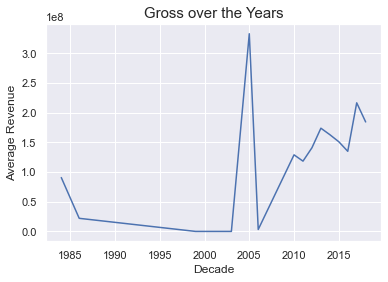

In [108]:
#line gross
dataset['start_year']= dataset['release_date'].dt.year
gross_mean= dataset.groupby(dataset['start_year'])['worldwide_gross'].mean()
print(gross_mean)
plt.plot(gross_mean)
plt.title('Gross over the Years', size=15);
plt.xlabel('Decade', size=12)
plt.ylabel('Average Revenue', size=12);

It is clear that the mean of the movie gross increase signinficantly from 2003 to 2005 

In [115]:
studio_mean= dataset.groupby(dataset['studio'])['worldwide_gross'].mean()
studio_mean.sort_values()

studio
BBC         7.943000e+03
KE          9.495300e+04
Alc         1.610970e+05
WHE         3.829460e+05
TFA         4.370890e+05
                ...     
Fox         2.322292e+08
Sony        2.541104e+08
GrtIndia    2.635029e+08
P/DW        5.078028e+08
BV          5.288055e+08
Name: worldwide_gross, Length: 86, dtype: float64

In [119]:
top5_studio= dataset[dataset['studio'].isin(['BV','P/DW','GrtIndia','Sony','Fox'])]

<AxesSubplot:xlabel='worldwide_gross', ylabel='profit'>

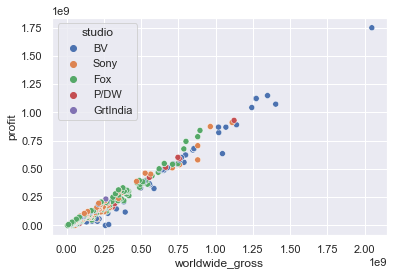

In [120]:
sns.scatterplot(data=top5_studio, x='worldwide_gross', y='profit', hue= 'studio')